# Logistic Regression Lesson 76 - 79 5_1_2020

In [1]:
'''
Lecture Notes: 
URL: 
https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb
'''

'\nLecture Notes: \nURL: \nhttps://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb\n'

In [2]:
# The focus here is on Binary classification (1,0) or True, False => Mostly for visual classification or cyber secuirty

In [3]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  #cross_validation is depricated

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head(20)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [6]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

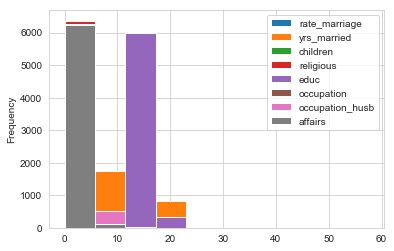

In [7]:
df.plot('age', kind = "hist")

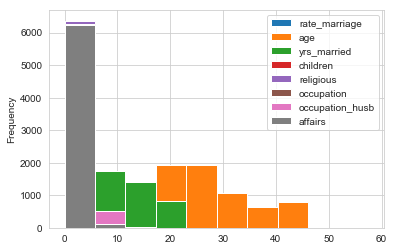

In [8]:
df.plot('educ', kind = 'hist')

In [9]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    


In [10]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [11]:
df.head(10)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [12]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [13]:
df.groupby('Had_Affair').count()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


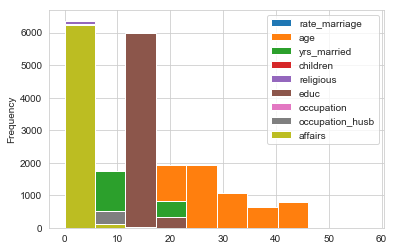

In [14]:
df.plot("Had_Affair",kind = "hist")

In [15]:
# Data Preparatio: 
# Pandas has a way to create dummy variables. 
occ_dummies = pd.get_dummies(df['occupation'])

In [19]:

occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5', 'occ6']
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [25]:
hus_occ_dummpies = pd.get_dummies(df['occupation_husb'])
type(hus_occ_dummpies)

pandas.core.frame.DataFrame

In [34]:
hus_occ_dummpies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5', 'hocc6']
hus_occ_dummpies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [35]:
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis = 1)

In [36]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [37]:
dummies = pd.concat([occ_dummies,hus_occ_dummpies],axis = 1)

In [38]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
X = pd.concat([X, dummies],axis = 1)

In [40]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [41]:
Y = df.Had_Affair 
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

# Multicollinearity

In [56]:
# The coloumns of data may be highly correlated to each other such that it is hard to determine the cause.  So we drop one.
# we will drop the first column of each set of 1. occ and 2. hocc

In [57]:
X = X.drop(['occ1','hocc1'],axis = 1)
X.head()


KeyError: "['occ1' 'hocc1'] not found in axis"

In [ ]:
X = X.drop('affairs', axis = 1)

In [ ]:
X.head()

# Y or the prediction value has to be in 1-dimention array to use SCI-Kit Learn, Scikitlearn has a method pre-built for that.


In [ ]:
Y.head()

In [59]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html  (numpy.ravel() to flatten the Y)

Y = np.ravel(Y)
print(Y)
y = Y

[1 1 1 ... 0 0 0]


In [62]:
'''
Just like linear Regression: 
1. Initiate a model
2. Find the fit
3. measure accuracy
4. Split the data in to Training and Test 

'''

log_model = LogisticRegression(random_state = 0)    # Step 1
log_model.fit(X,y)                # Step: 2


accuracy = log_model.score(X,y)              # Step: 3   This gives the accuracy in percentage

accuracy_percent = accuracy*100
print(accuracy_percent)


72.46308513980522


c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
Y.mean()    #Percentage of women that had affairs 

0.3224945020420987

In [71]:
round(Y.mean(),2)*100    # 32 percent of women had affairs and our model had 72.46% accuracy rate of predicting who. 

32.0

In [ ]:
# 1 - 0.32 = 0.68 or 68% of randomly guessing who may have an affair....so our model is slightly better at 72.46% 
# This means that it is slightly better than the 'NUll ERROR' rate (is our predictive model), but the model is not that good.
# So now we need to look at the coefficient of different X, or columns/variables. 

In [76]:
log_model.coef_
trans_log_model_coef = np.transpose(log_model.coef_)
type(trans_log_model_coef)

numpy.ndarray

In [78]:
coeff_df = DataFrame(dict(zip(X.columns,trans_log_model_coef)))    # had to add dict from the original for python 3 code
coeff_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,-0.716289,-0.052986,0.099662,0.01976,-0.374951,0.028898,0.343634,0.604281,0.265505,0.914587,0.371948,0.45138,0.583373,0.392766,0.433393,0.462097


# Training and Testing dataset 

In [79]:
# from sklearn.model_selection import train_test_split  #cross_validation is depricated

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)  #By default, it is 25/75 split

In [80]:
log_model2 = LogisticRegression()
log_model2.fit(X_train, Y_train)
# This is to create a fit using training data, now we do prediction using test data

c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# testing data
# predict()
class_predict = log_model2.predict(X_test)

In [82]:
print(metrics.accuracy_score(Y_test, class_predict)) # comparing dependent variable of sample against the model/predict

0.7135678391959799


In [ ]:
#Conclusion:  the model has not improved much from the original...
#What can you do to improve the model over trials? 
#regularization techniques 
